### Note book for optimising delta_r

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optimizer import optimize_delta_r, optimize_step_size
from scipy.optimize import minimize_scalar, minimize
from physics.constants import m_earth_SI, m_moon_SI, d_earth_moon_SI

In [2]:
res = minimize_scalar(optimize_delta_r, bounds=(1.04, 1.05), method='bounded')
print(res.x)

1.0486172753617553


In [3]:
base_L2 = d_earth_moon_SI * (m_moon_SI/(3*m_earth_SI))**(1/3)
print(f'Optimal delta_r {base_L2*res.x*1e-3} km')
#print(o)
delta_rs = np.linspace(0.99, 1.1, 50) * base_L2 


Optimal delta_r 64520.21849913403 km


In [4]:
errors = []
for delta_r in delta_rs:
    ratio = delta_r / base_L2
    errors.append(optimize_delta_r(ratio))

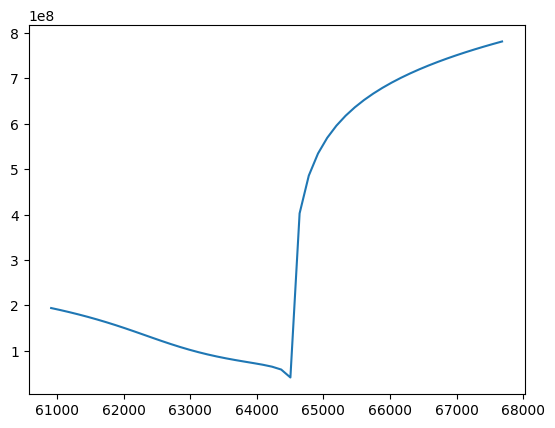

In [5]:
plt.plot(delta_rs*1e-3, errors)

In [6]:
res2 = minimize_scalar(optimize_step_size, bounds=(1e-2, 1e2), method='bounded')
optimal_step_size = res2.x
print(f'Optimal step size {optimal_step_size} s')

Optimal step size 79.11948622160372 s


In [7]:
step_sizes = np.logspace(-1, 2, 5)
print(step_sizes)

[  0.1          0.56234133   3.16227766  17.7827941  100.        ]


In [8]:
errors2 = []
for step_size in step_sizes:
    error2 = optimize_step_size(step_size)
    errors2.append(error2)

Optimal step size: 79.11948622160372 s with error 41000702.69969276


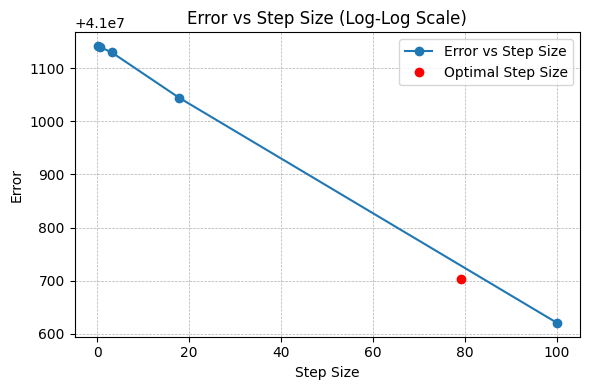

In [9]:
optimal_step_size_index = np.argmin(errors2)

plt.figure(figsize=(6,4))
plt.plot(step_sizes, errors2, marker='o', label='Error vs Step Size')
plt.plot(optimal_step_size,
         optimize_step_size(optimal_step_size),
         'ro', label='Optimal Step Size')
print(f'Optimal step size: {optimal_step_size} s with error {optimize_step_size(optimal_step_size)}')

plt.xlabel('Step Size')
plt.ylabel('Error')
plt.title('Error vs Step Size (Log-Log Scale)')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
